Find articles that made it to certain journals and compare key words.

In [1]:
#Need to add parent directoy to sys.path to find 'metadataDB'
import sys
sys.path.append('../')

%matplotlib inline
import matplotlib.pyplot as plt 
import time
import numpy as np

# Natural language processing toolkit
# To use this, run nltk.download() and download 'stopwords'
from nltk.corpus import stopwords
s=stopwords.words('english') + ['']

# SQL
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from metadataDB.declareDatabase import *
from sqlalchemy import or_

engine = create_engine("sqlite:///../arXiv_metadata.db", echo=False)
Base.metadata.bind = engine
DBsession = sessionmaker(bind=engine)
session = DBsession()

In [2]:
query = session.query(Article).filter(or_(Article.journal_ref.like('Physics Review Letters%'),
                                          Article.journal_ref.like('Phys. Rev. Lett.%'),
                                          Article.journal_ref.like('PRL%'),
                                          ))
# query = session.query(Article).filter(Article.journal_ref.like('PRL%'))
resultPRL = query.all()

In [3]:
query = session.query(Article).filter(or_(Article.journal_ref.like('Nature%'),
                                          Article.journal_ref.like('Nat.%'),
                                          Article.journal_ref.like('Science%')))
# query = session.query(Article).filter(Article.journal_ref.like('PRL%'))
resultNatureScience = query.all()

In [4]:
abstract = dict()
abstractPRL = dict()
title = dict()
titlePRL = dict()

numWords = 0
numArticles = len(resultPRL)

start = time.time()
for item in resultPRL:
#     print item.abstract
    for word in set((item.abstract).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in abstractPRL.keys():
#                 abstractPRL[word] += 1
#             else:
#                 abstractPRL[word] =1
            if word in abstract.keys():
                abstract[word] -= 1./numArticles
            else:
                abstract[word] = -1./numArticles
            numWords += 1
            
    for word in set((item.title).replace('\n',' ') \
                               .replace('\\','') \
                               .replace('(','') \
                               .replace(')','') \
                               .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in titlePRL.keys():
#                 titlePRL[word] += 1
#             else:
#                 titlePRL[word] =1
            if word in title.keys():
                title[word] -= 1./numArticles
            else:
                title[word] = -1./numArticles
            numWords += 1

total_time = time.time() - start
print "%f sec., %i articles, %i words" % (total_time, numArticles, numWords)
print "%0.0f articles per second" % (numArticles/total_time)
print "%0.0f words per second" % (numWords/total_time)

74.471748 sec., 5027 articles, 223235 words
68 articles per second
2998 words per second


In [5]:
abstractNature = dict()
titleNature = dict()

numWords = 0
numArticles = len(resultNatureScience)

start = time.time()
for item in resultNatureScience:
#     print item.abstract
    for word in set((item.abstract).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in abstractNature.keys():
#                 abstractNature[word] += 1
#             else:
#                 abstractNature[word] =1
            if word in abstract.keys():
                abstract[word] += 1./numArticles
            else:
                abstract[word] = 1./numArticles
        numWords += 1

    for word in set((item.title).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in titleNature.keys():
#                 titleNature[word] += 1
#             else:
#                 titleNature[word] =1
            if word in title.keys():
                title[word] += 1./numArticles
            else:
                title[word] = 1./numArticles
        numWords += 1

total_time = time.time() - start
print "%f sec., %i articles, %i words" % (total_time, numArticles, numWords)
print "%0.0f articles per second" % (numArticles/total_time)
print "%0.0f words per second" % (numWords/total_time)

23.829864 sec., 778 articles, 85642 words
33 articles per second
3594 words per second


In [6]:
session.close()

In [7]:
# Want to sort dictionary by values. Convert it to a list of tuples so we can use python's sort functions
abstract_wordlist = sorted([(key, val) for key, val in abstract.iteritems()], key=lambda x: x[1])
title_wordlist = sorted([(key, val) for key, val in title.iteritems()], key=lambda x: x[1])

In [8]:
abstract_best_and_worst = abstract_wordlist[0:10] + abstract_wordlist[-11:-1]
print abstract_best_and_worst

[(u'study', -0.0871310348283782), (u'model', -0.06751408716836448), (u'function', -0.045447641859920285), (u'behavior', -0.04364196833244424), (u'find', -0.04315334724620665), (u'dependence', -0.03972456191578318), (u'finite', -0.03935713726851853), (u'numerical', -0.038928603024388), (u'investigate', -0.03577647285634428), (u'spin', -0.0351354613109765), (u'discovery', 0.07601906005769354), (u'information', 0.07791601444743372), (u'direct', 0.07835989001295317), (u'observations', 0.08573548595936693), (u'many', 0.09409011389908373), (u'high', 0.09531332859116048), (u'stars', 0.10223098609411484), (u'may', 0.10663701359701315), (u'matter', 0.11255953071920617), (u'new', 0.11525167693427217)]


In [9]:
title_best_and_worst = title_wordlist[0:10] + title_wordlist[-11:-1]
print title_best_and_worst

[(u'model', -0.02082609947415061), (u'spin', -0.020428503561487704), (u'Comment', -0.019005084625285648), (u'systems', -0.017444360862652705), (u'Hall', -0.017398592587175743), (u'transition', -0.016893607424790416), (u'Phase', -0.015883637100019762), (u'Model', -0.015638687335176663), (u'States', -0.015439761534500314), (u'Dynamics', -0.014751191892827557), (u'Stars', 0.010282776349614395), (u'Star', 0.011369197592639848), (u'Galaxy', 0.011568123393316195), (u'High', 0.011828158790858408), (u'Galactic', 0.012853470437017995), (u'star', 0.012853470437017995), (u'Black', 0.012853470437017995), (u'superconductor', 0.013893867715876675), (u'Formation', 0.014398852878262008), (u'galaxies', 0.017994858611825194)]


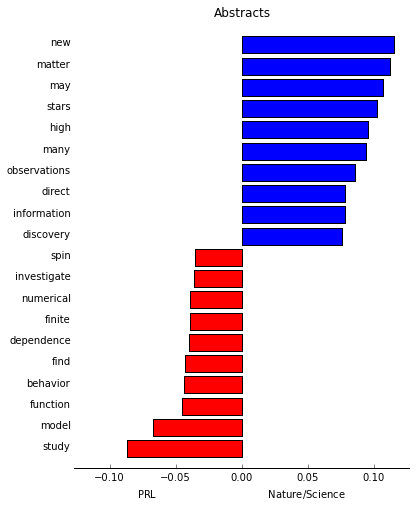

In [10]:
words = [x for (x,y) in abstract_best_and_worst]
vals = np.array([y for (x,y) in abstract_best_and_worst])


ind = np.arange(0, len(words))
c = ['b' if x > 0 else 'r' for x in vals]

plt.figure(frameon=False, figsize=(6,8))
plt.barh(ind - 0.5,
         vals,
         color=c)
plt.yticks(ind, words)
plt.ylim(ind[0]-1, ind[-1]+1)
plt.xlim(-1.1*np.max(np.abs(vals)), 1.1*np.max(np.abs(vals)))
plt.title('Abstracts')
plt.xlabel('PRL$\qquad\qquad\qquad\qquad$Nature/Science')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')

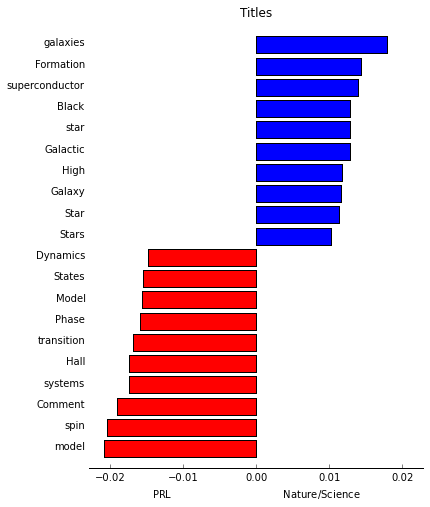

In [11]:
words = [x for (x,y) in title_best_and_worst]
vals = np.array([y for (x,y) in title_best_and_worst])


ind = np.arange(0, len(words))
c = ['b' if x > 0 else 'r' for x in vals]

plt.figure(frameon=False, figsize=(6,8))
plt.barh(ind - 0.5,
         vals,
         color=c)
plt.yticks(ind, words)
plt.ylim(ind[0]-1, ind[-1]+1)
plt.xlim(-1.1*np.max(np.abs(vals)), 1.1*np.max(np.abs(vals)))
plt.title('Titles')
plt.xlabel('PRL$\qquad\qquad\qquad\qquad$Nature/Science')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')